# Data Preprocessing

In [1]:
# Importing necessery libraries and packages

import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import MinMaxScaler

In [2]:
patientRecord = pd.read_csv("/content/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv") # Reading Beneficiary data

In [3]:
inpatientRecord = pd.read_csv("/content/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv") # Reading Inpatient data

In [4]:
patientRecord.dtypes # Checking data types

DESYNPUF_ID                  object
BENE_BIRTH_DT                 int64
BENE_DEATH_DT               float64
BENE_SEX_IDENT_CD             int64
BENE_RACE_CD                  int64
BENE_ESRD_IND                object
SP_STATE_CODE                 int64
BENE_COUNTY_CD                int64
BENE_HI_CVRAGE_TOT_MONS       int64
BENE_SMI_CVRAGE_TOT_MONS      int64
BENE_HMO_CVRAGE_TOT_MONS      int64
PLAN_CVRG_MOS_NUM             int64
SP_ALZHDMTA                   int64
SP_CHF                        int64
SP_CHRNKIDN                   int64
SP_CNCR                       int64
SP_COPD                       int64
SP_DEPRESSN                   int64
SP_DIABETES                   int64
SP_ISCHMCHT                   int64
SP_OSTEOPRS                   int64
SP_RA_OA                      int64
SP_STRKETIA                   int64
MEDREIMB_IP                 float64
BENRES_IP                   float64
PPPYMT_IP                   float64
MEDREIMB_OP                 float64
BENRES_OP                   

In [5]:
inpatientRecord.dtypes # Checking data types

DESYNPUF_ID     object
CLM_ID           int64
SEGMENT          int64
CLM_FROM_DT    float64
CLM_THRU_DT    float64
                ...   
HCPCS_CD_41    float64
HCPCS_CD_42    float64
HCPCS_CD_43    float64
HCPCS_CD_44    float64
HCPCS_CD_45    float64
Length: 81, dtype: object

In [6]:
patientRecord.shape # Checking shape of data

(116352, 32)

In [7]:
inpatientRecord.shape # Checking shape of data

(66773, 81)

In [8]:
patientRecord.info() # Concise summary of a Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116352 entries, 0 to 116351
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               116352 non-null  object 
 1   BENE_BIRTH_DT             116352 non-null  int64  
 2   BENE_DEATH_DT             1814 non-null    float64
 3   BENE_SEX_IDENT_CD         116352 non-null  int64  
 4   BENE_RACE_CD              116352 non-null  int64  
 5   BENE_ESRD_IND             116352 non-null  object 
 6   SP_STATE_CODE             116352 non-null  int64  
 7   BENE_COUNTY_CD            116352 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   116352 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  116352 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  116352 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         116352 non-null  int64  
 12  SP_ALZHDMTA               116352 non-null  int64  
 13  SP_CHF                    116352 non-null  i

In [9]:
inpatientRecord.info() # Concise summary of a Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66773 entries, 0 to 66772
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DESYNPUF_ID                     66773 non-null  object 
 1   CLM_ID                          66773 non-null  int64  
 2   SEGMENT                         66773 non-null  int64  
 3   CLM_FROM_DT                     66705 non-null  float64
 4   CLM_THRU_DT                     66705 non-null  float64
 5   PRVDR_NUM                       66773 non-null  object 
 6   CLM_PMT_AMT                     66773 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        66773 non-null  float64
 8   AT_PHYSN_NPI                    66100 non-null  float64
 9   OP_PHYSN_NPI                    39058 non-null  float64
 10  OT_PHYSN_NPI                    7683 non-null   float64
 11  CLM_ADMSN_DT                    66773 non-null  int64  
 12  ADMTNG_ICD9_DGNS_CD             

In [10]:
inpatientID = inpatientRecord["DESYNPUF_ID"] # We will take the IDs from inpatient data

In [11]:
# We will create a new dataframe by using ID in the inpatient data

df_inpatient = patientRecord.loc[patientRecord["DESYNPUF_ID"].isin(inpatientID)]

In [12]:
df_inpatient # New dataframe

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
13,00052705243EA128,19340501,NaN,1,1,0,14,982,12,12,...,2,14000.0,1024.0,0.0,4240.0,3130.0,0.0,6740.0,2130.0,1200.0
16,0007F12A492FD25D,19190901,NaN,2,2,0,34,400,12,12,...,1,5000.0,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0
19,000B97BA2314E971,19380401,NaN,1,1,0,22,20,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,290.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116334,FFF5F9218AB04A41,19531001,NaN,2,1,0,33,700,12,12,...,1,5000.0,1024.0,0.0,1480.0,160.0,0.0,1010.0,500.0,40.0
116338,FFF8B49458F9FFA7,19200101,NaN,2,1,0,1,440,12,12,...,2,13000.0,2048.0,0.0,2470.0,820.0,0.0,2820.0,1020.0,800.0
116342,FFFA950301FCA748,19590701,NaN,1,1,0,27,140,12,12,...,2,0.0,0.0,0.0,1540.0,500.0,0.0,970.0,160.0,0.0
116345,FFFC880E13CA6278,19361201,NaN,2,1,0,36,170,12,12,...,2,10320.0,1024.0,0.0,50.0,30.0,0.0,100.0,30.0,0.0


In [13]:
# We will create an array to label inpatients as 1 and outpatients as 0.

# Next steps are for labeling inpatients as 1

inpatientArr = np.full(shape=len(df_inpatient),fill_value=1,dtype=np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [14]:
df_inpatient_w_label = df_inpatient

In [15]:
df_inpatient_w_label["INPATIENT"] = inpatientArr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_inpatient_w_label # Labeled inpatients dataframe

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1
13,00052705243EA128,19340501,NaN,1,1,0,14,982,12,12,...,14000.0,1024.0,0.0,4240.0,3130.0,0.0,6740.0,2130.0,1200.0,1
16,0007F12A492FD25D,19190901,NaN,2,2,0,34,400,12,12,...,5000.0,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,1
19,000B97BA2314E971,19380401,NaN,1,1,0,22,20,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,290.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116334,FFF5F9218AB04A41,19531001,NaN,2,1,0,33,700,12,12,...,5000.0,1024.0,0.0,1480.0,160.0,0.0,1010.0,500.0,40.0,1
116338,FFF8B49458F9FFA7,19200101,NaN,2,1,0,1,440,12,12,...,13000.0,2048.0,0.0,2470.0,820.0,0.0,2820.0,1020.0,800.0,1
116342,FFFA950301FCA748,19590701,NaN,1,1,0,27,140,12,12,...,0.0,0.0,0.0,1540.0,500.0,0.0,970.0,160.0,0.0,1
116345,FFFC880E13CA6278,19361201,NaN,2,1,0,36,170,12,12,...,10320.0,1024.0,0.0,50.0,30.0,0.0,100.0,30.0,0.0,1


In [17]:
# We will create an array to label inpatients as 1 and outpatients as 0

# We will remove inpatient records from the patient records to find the number of outpatients

df_outpatient = patientRecord.loc[~patientRecord["DESYNPUF_ID"].isin(inpatientID)]

# Next steps are for labeling outpatients as 0

patientArr = np.full(shape=len(df_outpatient),fill_value=0,dtype=np.int) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


In [18]:
df_outpatient

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0
5,0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0002F28CE057345B,19220701,NaN,1,1,0,39,270,12,12,...,2,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116346,FFFD1F9EE7AF231B,19390701,NaN,1,1,0,39,140,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,640.0,110.0,10.0
116347,FFFD7C464C94D136,19430701,NaN,2,1,0,54,0,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116349,FFFE7AB5D7F1725D,19390401,NaN,2,1,0,23,490,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116350,FFFF29A2E1362059,19110701,NaN,1,1,0,29,20,0,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_outpatient["INPATIENT"] = patientArr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_outpatient # Labeled outpatients dataframe

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,0
5,0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0002F28CE057345B,19220701,NaN,1,1,0,39,270,12,12,...,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116346,FFFD1F9EE7AF231B,19390701,NaN,1,1,0,39,140,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,640.0,110.0,10.0,0
116347,FFFD7C464C94D136,19430701,NaN,2,1,0,54,0,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
116349,FFFE7AB5D7F1725D,19390401,NaN,2,1,0,23,490,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
116350,FFFF29A2E1362059,19110701,NaN,1,1,0,29,20,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
# We will combine two dataframe with label column added
data = pd.concat([df_outpatient,df_inpatient_w_label],ignore_index=True)

In [22]:
data

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
0,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,0
3,0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0002F28CE057345B,19220701,NaN,1,1,0,39,270,12,12,...,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,FFF5F9218AB04A41,19531001,NaN,2,1,0,33,700,12,12,...,5000.0,1024.0,0.0,1480.0,160.0,0.0,1010.0,500.0,40.0,1
116348,FFF8B49458F9FFA7,19200101,NaN,2,1,0,1,440,12,12,...,13000.0,2048.0,0.0,2470.0,820.0,0.0,2820.0,1020.0,800.0,1
116349,FFFA950301FCA748,19590701,NaN,1,1,0,27,140,12,12,...,0.0,0.0,0.0,1540.0,500.0,0.0,970.0,160.0,0.0,1
116350,FFFC880E13CA6278,19361201,NaN,2,1,0,36,170,12,12,...,10320.0,1024.0,0.0,50.0,30.0,0.0,100.0,30.0,0.0,1


In [23]:
# From the inpatient records, we will look at the ICD records (584.*) to find those admitted for kidney disease

In [24]:
dfKidneyInpatientRecord = inpatientRecord[(inpatientRecord["ICD9_DGNS_CD_1"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_1"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_1"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_1"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_1"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_1"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_2"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_2"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_2"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_2"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_2"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_2"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_3"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_3"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_3"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_3"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_3"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_3"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_4"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_4"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_4"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_4"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_4"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_4"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_5"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_5"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_5"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_5"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_5"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_5"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_6"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_6"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_6"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_6"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_6"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_6"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_7"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_7"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_7"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_7"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_7"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_7"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_8"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_8"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_8"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_8"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_8"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_8"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_9"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_9"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_9"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_9"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_9"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_9"]=="5849") |
     (inpatientRecord["ICD9_DGNS_CD_10"]=="5845") | (inpatientRecord["ICD9_DGNS_CD_10"]=="584") |
     (inpatientRecord["ICD9_DGNS_CD_10"]=="5846") | (inpatientRecord["ICD9_DGNS_CD_10"]=="5847") | 
     (inpatientRecord["ICD9_DGNS_CD_10"]=="5848") | (inpatientRecord["ICD9_DGNS_CD_10"]=="5849")]

In [25]:
dfKidneyInpatientRecord 

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0007F12A492FD25D,196551177025145,1,20100522.0,20100612.0,3400WD,14000.0,0.0,1.907447e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,000C7486B11E7030,196641176984178,1,20081015.0,20081021.0,4400MM,30000.0,0.0,5.520895e+09,6.142535e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,001AFA59A08ABBF1,196341177018516,1,20080523.0,20080526.0,52T0QU,13000.0,0.0,2.086668e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,001F135A720283D1,196821177006415,1,20091109.0,20091111.0,2301XK,15000.0,0.0,4.003955e+09,8.176931e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66731,FFD1CECC7E439A44,196451176970087,1,20081029.0,20081103.0,1002TM,8000.0,0.0,4.771923e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66734,FFD85AF13B62FCCB,196881176993090,1,20100706.0,20100707.0,3400SP,9000.0,0.0,9.647967e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66736,FFD8B2F8BF0402B0,196871176999312,1,20090720.0,20090726.0,5200GH,12000.0,0.0,3.687493e+09,1.495058e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66743,FFDE9CD85469D4C0,196191176960753,1,20080616.0,20080619.0,3302DC,2000.0,0.0,3.792925e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
kidneyInpatient = data.loc[data["DESYNPUF_ID"].isin(dfKidneyInpatientRecord["DESYNPUF_ID"])] # New inpatient dataframe with kidney disease

In [27]:
# The aim is to find the patient's age by subtracting the dates of birth from the registration dates
# We will take kidney patients records from inpatients data
date_kidney_record = inpatientRecord.loc[inpatientRecord["DESYNPUF_ID"].isin(kidneyInpatient["DESYNPUF_ID"])]

# Unique records
date_kidney_record_unq = date_kidney_record.drop_duplicates("DESYNPUF_ID")

# We will take the date column from records to add dataframe
# Turning into array
date_kidney_record_arr = date_kidney_record_unq["CLM_ADMSN_DT"].to_numpy()



# A new date column will be added to the dataframe
kidneyInpatient.insert(loc=2,column="ADMS_DT",value=date_kidney_record_arr)


In [28]:
kidneyInpatient

,DESYNPUF_ID,BENE_BIRTH_DT,ADMS_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
78573,00016F745862898F,19430101,20090412,NaN,1,1,0,39,230,12,...,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1
78575,0007F12A492FD25D,19190901,20080919,NaN,2,2,0,34,400,12,...,5000.0,1024.0,0.0,5510.0,1380.0,0.0,4980.0,1170.0,200.0,1
78577,000C7486B11E7030,19320801,20081015,NaN,1,2,0,25,350,12,...,30000.0,1024.0,0.0,0.0,0.0,0.0,720.0,290.0,0.0,1
78586,001AFA59A08ABBF1,19371001,20080523,NaN,2,1,0,52,40,12,...,29000.0,2048.0,0.0,6240.0,160.0,0.0,5460.0,1720.0,30.0,1
78588,001F135A720283D1,19360301,20091109,NaN,1,1,0,23,620,12,...,0.0,0.0,0.0,1500.0,350.0,0.0,2400.0,490.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116323,FFD1CECC7E439A44,19560501,20080508,NaN,1,1,0,54,999,12,...,77500.0,8120.0,0.0,0.0,0.0,0.0,2890.0,520.0,0.0,1
116326,FFD85AF13B62FCCB,19250401,20100706,NaN,1,1,0,34,800,12,...,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,710.0,100.0,1
116327,FFD8B2F8BF0402B0,19231201,20090425,NaN,2,1,0,52,500,12,...,0.0,0.0,0.0,0.0,0.0,0.0,270.0,50.0,0.0,1
116332,FFDE9CD85469D4C0,19430301,20080616,NaN,2,1,0,33,400,12,...,2000.0,1024.0,0.0,20.0,0.0,0.0,250.0,130.0,0.0,1


In [29]:
# We will create a normal inpatient data set with data that does not contain ICD code related to kidney disease
normalInpatient = data.loc[~data["DESYNPUF_ID"].isin(dfKidneyInpatientRecord["DESYNPUF_ID"])]

In [30]:
# From all data, we filter patients hospitalized for normal disease
normalInpatient = normalInpatient[(normalInpatient["INPATIENT"]==1)]

In [31]:
# The aim is to find the patient's age by subtracting the dates of birth from the registration dates
# We will take not kidney patients records from inpatients data

date_normal_record = inpatientRecord.loc[inpatientRecord["DESYNPUF_ID"].isin(normalInpatient["DESYNPUF_ID"])]
date_normal_record_unq = date_normal_record.drop_duplicates("DESYNPUF_ID")
date_normal_record_arr = date_normal_record_unq["CLM_ADMSN_DT"].to_numpy()
normalInpatient.insert(loc=2,column="ADMS_DT",value=date_normal_record_arr)


In [32]:
normalInpatient

,DESYNPUF_ID,BENE_BIRTH_DT,ADMS_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
78572,00013D2EFD8E45D1,19230501,20100312,NaN,1,1,0,26,950,12,...,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1
78574,00052705243EA128,19340501,20080912,NaN,1,1,0,14,982,12,...,14000.0,1024.0,0.0,4240.0,3130.0,0.0,6740.0,2130.0,1200.0,1
78576,000B97BA2314E971,19380401,20091209,NaN,1,1,0,22,20,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1020.0,290.0,0.0,1
78578,00108066CA1FACCE,19650401,20090930,NaN,1,1,0,3,90,12,...,0.0,0.0,0.0,1280.0,120.0,0.0,890.0,280.0,0.0,1
78579,0011714C14B52EEB,19400401,20090826,NaN,2,1,0,38,10,12,...,0.0,0.0,0.0,70.0,50.0,0.0,350.0,200.0,90.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116347,FFF5F9218AB04A41,19531001,20081018,NaN,2,1,0,33,700,12,...,5000.0,1024.0,0.0,1480.0,160.0,0.0,1010.0,500.0,40.0,1
116348,FFF8B49458F9FFA7,19200101,20080329,NaN,2,1,0,1,440,12,...,13000.0,2048.0,0.0,2470.0,820.0,0.0,2820.0,1020.0,800.0,1
116349,FFFA950301FCA748,19590701,20100109,NaN,1,1,0,27,140,12,...,0.0,0.0,0.0,1540.0,500.0,0.0,970.0,160.0,0.0,1
116350,FFFC880E13CA6278,19361201,20081012,NaN,2,1,0,36,170,12,...,10320.0,1024.0,0.0,50.0,30.0,0.0,100.0,30.0,0.0,1


In [33]:
outpatient = data[(data["INPATIENT"] == 0)]

outpatient

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT
0,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,0
3,0002DAE1C81CC70D,19431001,NaN,1,2,0,33,400,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0002F28CE057345B,19220701,NaN,1,1,0,39,270,12,12,...,0.0,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78567,FFFD1F9EE7AF231B,19390701,NaN,1,1,0,39,140,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,640.0,110.0,10.0,0
78568,FFFD7C464C94D136,19430701,NaN,2,1,0,54,0,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78569,FFFE7AB5D7F1725D,19390401,NaN,2,1,0,23,490,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
78570,FFFF29A2E1362059,19110701,NaN,1,1,0,29,20,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [34]:
# We will add a default date for outpatients. This data set belongs to 2008 - 2010 so we can choose 2009 as the default value. It would not harm the balance of the dataset.

outpatient.insert(loc=2,column = "ADMS_DT", value=np.nan)
outpatient["ADMS_DT"] = outpatient["ADMS_DT"].fillna(pd.to_datetime('2009-01-01'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
# We will change the date format.

outpatient["ADMS_DT"] = outpatient["ADMS_DT"].fillna(pd.to_datetime('2009-01-01'))
normalInpatient["ADMS_DT"] = normalInpatient["ADMS_DT"].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))
kidneyInpatient["ADMS_DT"] = kidneyInpatient["ADMS_DT"].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
# We will add label for  kidney inpatient

kidneyArr = np.full(len(kidneyInpatient),fill_value=2,dtype=np.int)
kidneyInpatient["KIDNEY_INPATIENT"] = kidneyArr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after re

In [37]:
# We will add label for normal inpatient

normalArr = np.full(shape=len(normalInpatient),fill_value=1,dtype=np.int)
normalInpatient["KIDNEY_INPATIENT"] = normalArr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
outpatientArr = np.full(shape=len(outpatient),fill_value=0,dtype=np.int)
outpatient["KIDNEY_INPATIENT"] = outpatientArr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
# In our data set, the number of hospitalized kidney patients is much less than the patients who have been hospitalized for another reason and have never been hospitalized. This imbalance is likely to adversely affect the performance of the model we will train.
# We will take samples from our other datasets so that we have close to the number of people hospitalized for kidney disease.

normalInpatientSample = normalInpatient.sample(frac = 0.095)
outpatientSample=outpatient.sample(frac = 0.030)

In [40]:
# We will combine all the datasets we have

data = pd.concat([normalInpatientSample,outpatientSample,kidneyInpatient])

In [41]:
data

,DESYNPUF_ID,BENE_BIRTH_DT,ADMS_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT,KIDNEY_INPATIENT
97188,7CEB1C260952E2D0,19230601,2009-09-02,NaN,1,1,0,17,300,12,...,0.0,0.0,5700.0,1810.0,0.0,1670.0,460.0,0.0,1,1
84838,299B93B55791AC1A,19480901,2008-04-12,NaN,2,1,0,5,440,12,...,1024.0,0.0,1120.0,80.0,0.0,1830.0,370.0,0.0,1,1
99554,8D1F049EEA18212F,19690801,2009-10-16,NaN,1,5,0,6,630,12,...,0.0,0.0,660.0,450.0,0.0,2160.0,500.0,0.0,1,1
96101,75AF8D52ABC4B82F,19400601,2009-01-09,NaN,2,1,0,5,400,12,...,0.0,0.0,370.0,510.0,0.0,540.0,120.0,0.0,1,1
92857,5FD05930C4F5B628,19700401,2009-10-02,NaN,1,1,0,50,170,12,...,0.0,0.0,210.0,620.0,0.0,500.0,140.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116323,FFD1CECC7E439A44,19560501,2008-05-08,NaN,1,1,0,54,999,12,...,8120.0,0.0,0.0,0.0,0.0,2890.0,520.0,0.0,1,2
116326,FFD85AF13B62FCCB,19250401,2010-07-06,NaN,1,1,0,34,800,12,...,0.0,0.0,0.0,0.0,0.0,2020.0,710.0,100.0,1,2
116327,FFD8B2F8BF0402B0,19231201,2009-04-25,NaN,2,1,0,52,500,12,...,0.0,0.0,0.0,0.0,0.0,270.0,50.0,0.0,1,2
116332,FFDE9CD85469D4C0,19430301,2008-06-16,NaN,2,1,0,33,400,12,...,1024.0,0.0,20.0,0.0,0.0,250.0,130.0,0.0,1,2


In [42]:
# Our data set that we will use for our models is ready in general terms.
# Before we start training the model, we will make final adjustments to the dataset to avoid obvious errors that may arise.

# We will change it to 1 as those with chronic kidney disease are labeled Y
data["BENE_ESRD_IND"] = data["BENE_ESRD_IND"].replace("Y",1)

In [43]:
# We have a column with missing values ​​in our dataset. We will remove this column to train our model

data = data.drop(['BENE_DEATH_DT'], axis=1)

In [44]:
# We will edit the date format.

data["BENE_BIRTH_DT"] = data["BENE_BIRTH_DT"].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))

In [45]:
# Date of birth and date of registration will be added as new columns to find age

data['ADMS_DT_year'] = data.ADMS_DT.apply(lambda x: x.year)
data['BENE_BIRTH_DT_year'] = data.BENE_BIRTH_DT.apply(lambda x: x.year)

In [46]:
# Operations to find age
# After we find the age we will remove the birth date and registration date columns 

age = data['ADMS_DT_year'] - data['BENE_BIRTH_DT_year']
data.insert(loc=3,column = "BENE_AGE", value=age)
data = data.drop(["ADMS_DT_year"],axis=1)
data = data.drop(["BENE_BIRTH_DT_year"],axis = 1)
data

,DESYNPUF_ID,BENE_BIRTH_DT,ADMS_DT,BENE_AGE,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT,KIDNEY_INPATIENT
97188,7CEB1C260952E2D0,1923-06-01,2009-09-02,86,1,1,0,17,300,12,...,0.0,0.0,5700.0,1810.0,0.0,1670.0,460.0,0.0,1,1
84838,299B93B55791AC1A,1948-09-01,2008-04-12,60,2,1,0,5,440,12,...,1024.0,0.0,1120.0,80.0,0.0,1830.0,370.0,0.0,1,1
99554,8D1F049EEA18212F,1969-08-01,2009-10-16,40,1,5,0,6,630,12,...,0.0,0.0,660.0,450.0,0.0,2160.0,500.0,0.0,1,1
96101,75AF8D52ABC4B82F,1940-06-01,2009-01-09,69,2,1,0,5,400,12,...,0.0,0.0,370.0,510.0,0.0,540.0,120.0,0.0,1,1
92857,5FD05930C4F5B628,1970-04-01,2009-10-02,39,1,1,0,50,170,12,...,0.0,0.0,210.0,620.0,0.0,500.0,140.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116323,FFD1CECC7E439A44,1956-05-01,2008-05-08,52,1,1,0,54,999,12,...,8120.0,0.0,0.0,0.0,0.0,2890.0,520.0,0.0,1,2
116326,FFD85AF13B62FCCB,1925-04-01,2010-07-06,85,1,1,0,34,800,12,...,0.0,0.0,0.0,0.0,0.0,2020.0,710.0,100.0,1,2
116327,FFD8B2F8BF0402B0,1923-12-01,2009-04-25,86,2,1,0,52,500,12,...,0.0,0.0,0.0,0.0,0.0,270.0,50.0,0.0,1,2
116332,FFDE9CD85469D4C0,1943-03-01,2008-06-16,65,2,1,0,33,400,12,...,1024.0,0.0,20.0,0.0,0.0,250.0,130.0,0.0,1,2


In [47]:
# Information about the age column

data["BENE_AGE"].describe() 

count    11588.000000
mean        73.239558
std         12.984336
min         24.000000
25%         67.000000
50%         74.000000
75%         82.000000
max        101.000000
Name: BENE_AGE, dtype: float64

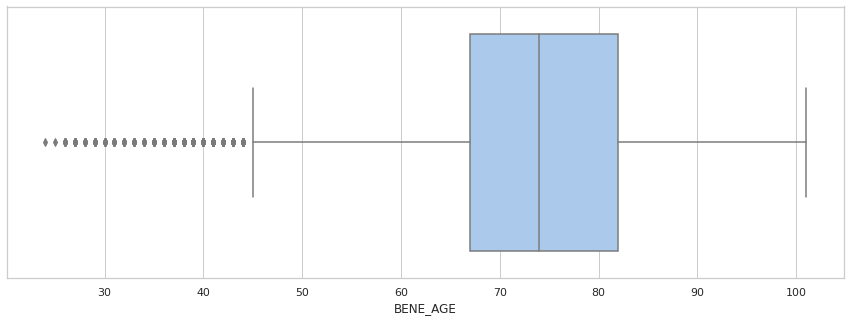

In [48]:
# A boxplot was plotted to observe outlier data
# It was observed that the number of patients up to the age of 47 was less than the total number of patients
# It was observed that the distribution was regular in patients between the ages of 47 and 100 years

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="pastel")
sb.boxplot(x=data["BENE_AGE"])
plt.show()

In [49]:
# We will remove patient ID's from the dataset.

data = data.drop(["DESYNPUF_ID"],axis=1)

# Data Visualization

In [50]:
# The dataframe will be rearranged to use all the data in the visualization

dataVis = pd.concat([outpatient,normalInpatient,kidneyInpatient])
dataVis = dataVis.drop(['BENE_DEATH_DT'], axis=1)
dataVis["BENE_BIRTH_DT"] = dataVis["BENE_BIRTH_DT"].apply(lambda x: pd.to_datetime(x,format='%Y%m%d'))
dataVis['ADMS_DT_year'] = dataVis.ADMS_DT.apply(lambda x: x.year)
dataVis['BENE_BIRTH_DT_year'] = dataVis.BENE_BIRTH_DT.apply(lambda x: x.year)
age = dataVis['ADMS_DT_year'] - dataVis['BENE_BIRTH_DT_year']
dataVis.insert(loc=3,column = "BENE_AGE", value=age)
dataVis = dataVis.drop(["ADMS_DT_year"],axis=1)
dataVis = dataVis.drop(["BENE_BIRTH_DT_year"],axis = 1)
dataVis

,DESYNPUF_ID,BENE_BIRTH_DT,ADMS_DT,BENE_AGE,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,INPATIENT,KIDNEY_INPATIENT
0,0001FDD721E223DC,1936-09-01,2009-01-01,73,2,1,0,39,280,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,00021CA6FF03E670,1941-06-01,2009-01-01,68,1,5,0,6,290,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,00024B3D2352D2D0,1936-08-01,2009-01-01,73,1,1,0,52,590,12,...,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,0,0
3,0002DAE1C81CC70D,1943-10-01,2009-01-01,66,1,2,0,33,400,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0002F28CE057345B,1922-07-01,2009-01-01,87,1,1,0,39,270,12,...,0.0,0.0,1010.0,270.0,0.0,3330.0,940.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116323,FFD1CECC7E439A44,1956-05-01,2008-05-08,52,1,1,0,54,999,12,...,8120.0,0.0,0.0,0.0,0.0,2890.0,520.0,0.0,1,2
116326,FFD85AF13B62FCCB,1925-04-01,2010-07-06,85,1,1,0,34,800,12,...,0.0,0.0,0.0,0.0,0.0,2020.0,710.0,100.0,1,2
116327,FFD8B2F8BF0402B0,1923-12-01,2009-04-25,86,2,1,0,52,500,12,...,0.0,0.0,0.0,0.0,0.0,270.0,50.0,0.0,1,2
116332,FFDE9CD85469D4C0,1943-03-01,2008-06-16,65,2,1,0,33,400,12,...,1024.0,0.0,20.0,0.0,0.0,250.0,130.0,0.0,1,2


In [51]:
dataVis["BENE_SEX_IDENT_CD"] = dataVis["BENE_SEX_IDENT_CD"].replace(2,0)

print("total female count : ",len(dataVis[(dataVis["BENE_SEX_IDENT_CD"]==0)]))
print("total male count : ",len(dataVis[(dataVis["BENE_SEX_IDENT_CD"]==1)]))

total female count :  64347
total male count :  52005


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


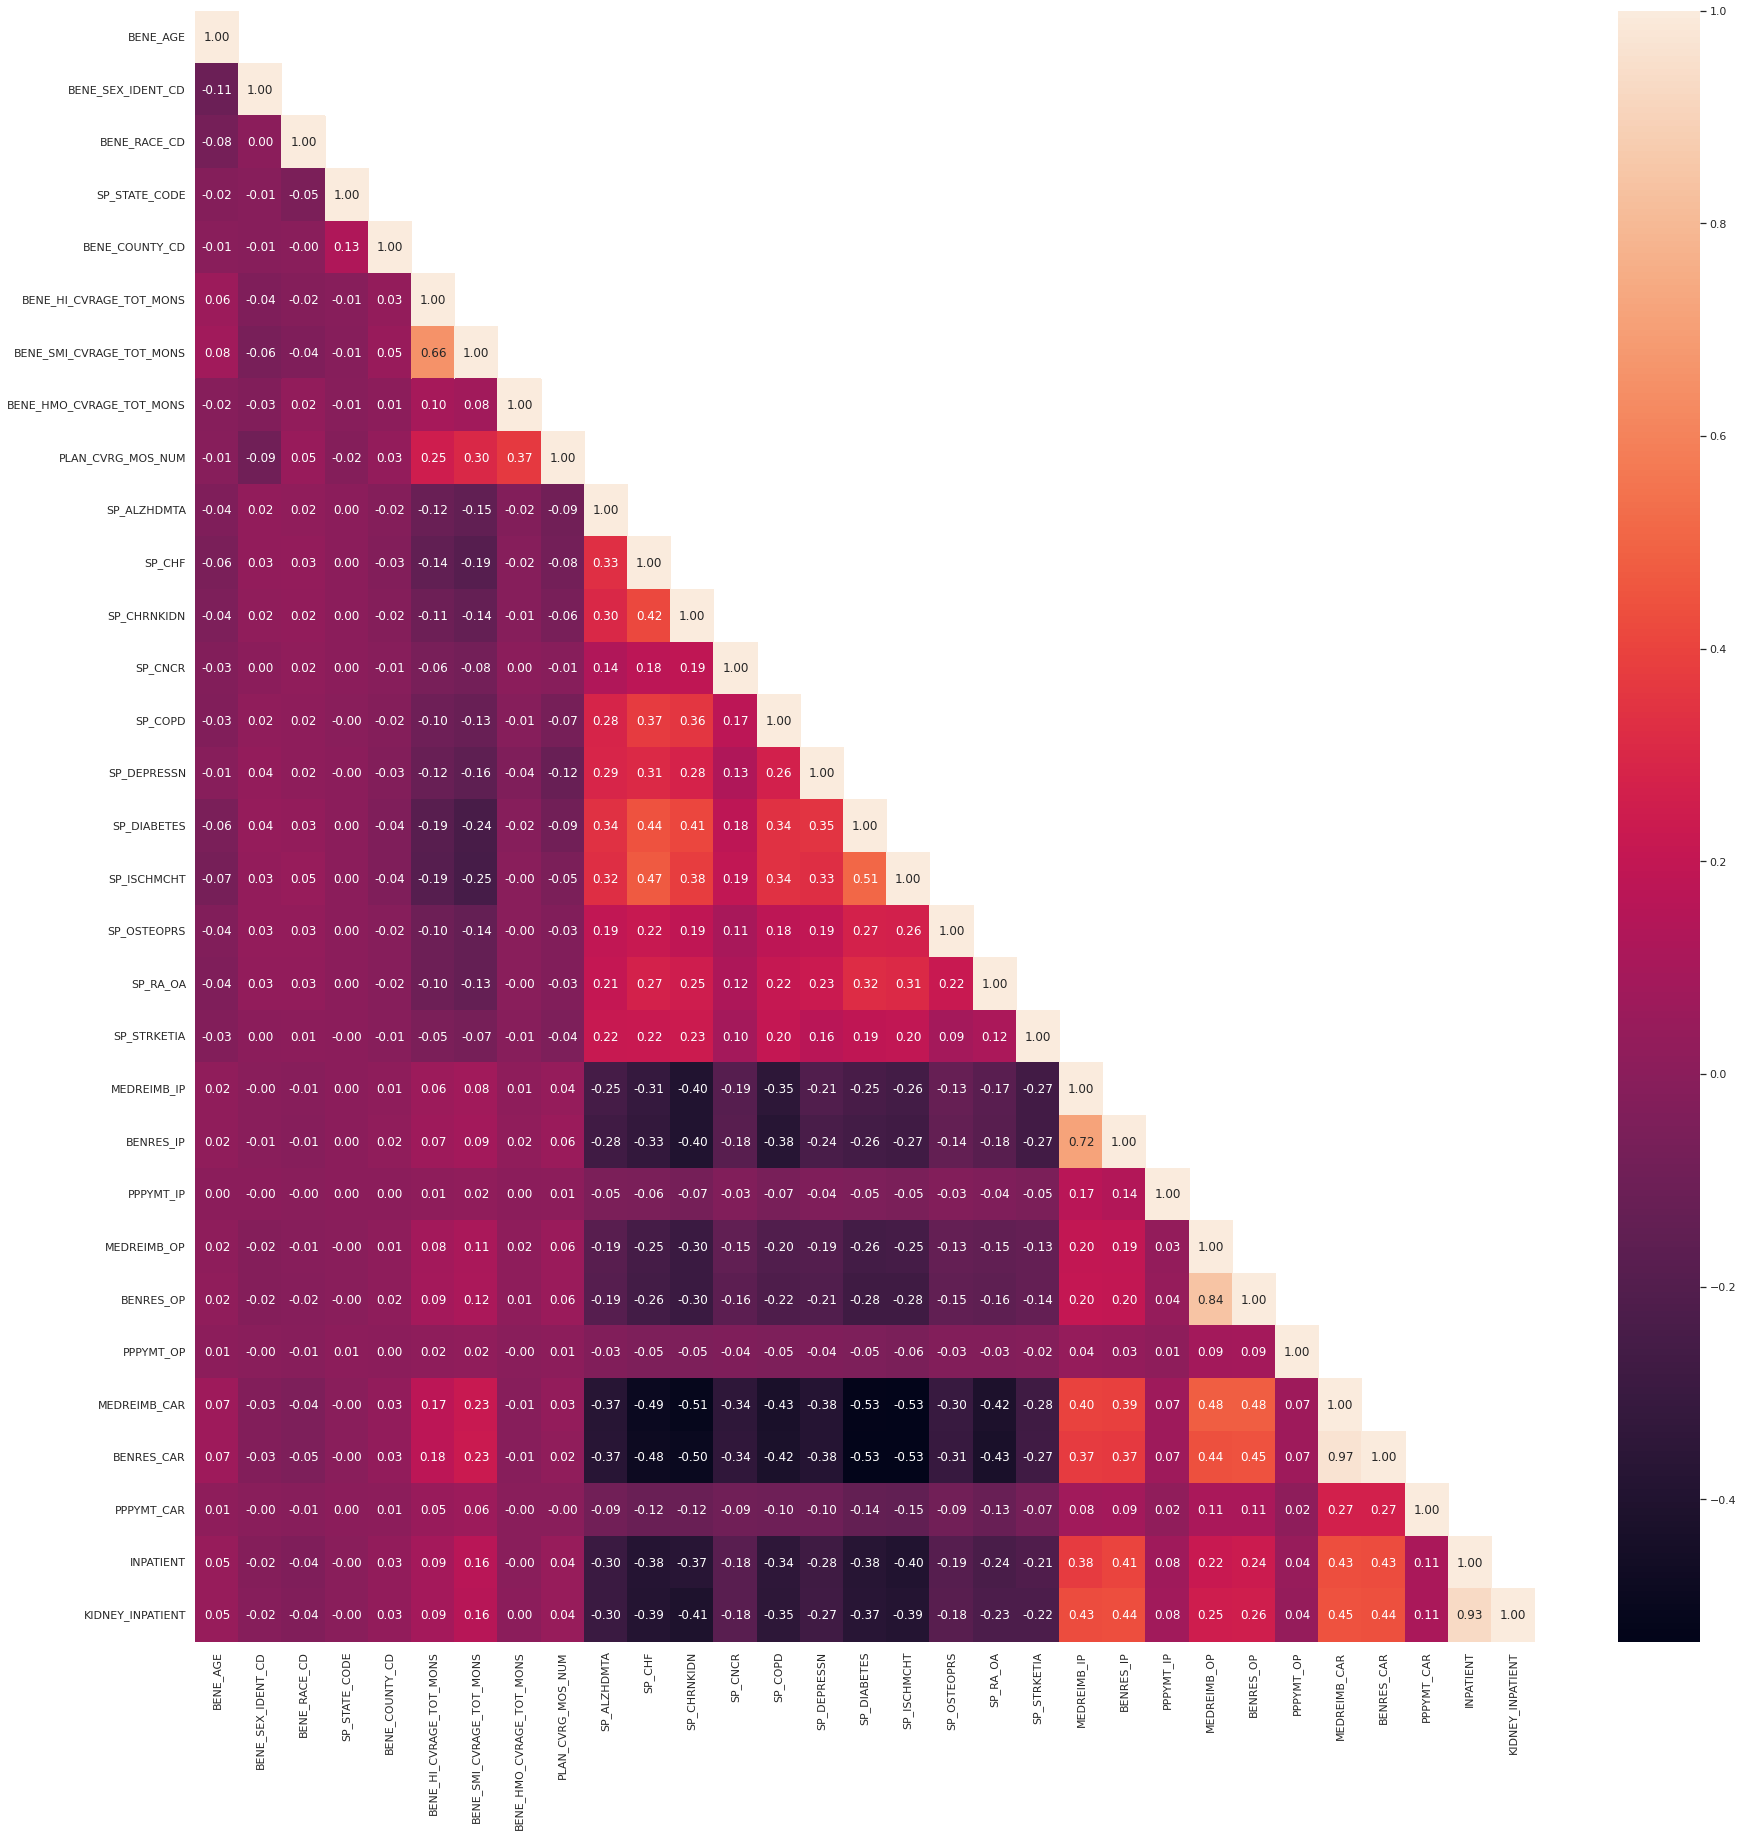

In [52]:
# Correlation between features
# We can understand which features have more effect on our model

conditions = dataVis
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (30.0, 30.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="rocket", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


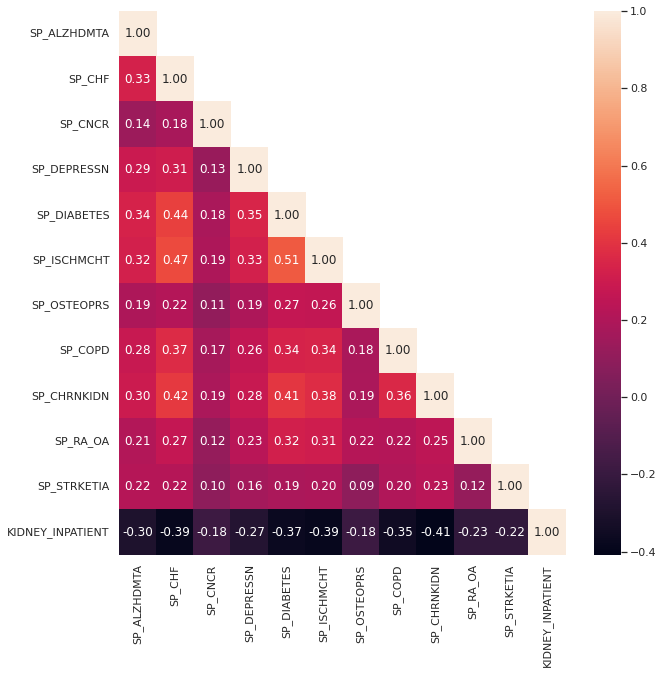

In [53]:
# To understand how some inherited diseases are linked to kidney disease, we can look at a correlation like the one below.

conditions = dataVis[["SP_ALZHDMTA", "SP_CHF", "SP_CNCR", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT","SP_OSTEOPRS", "SP_COPD", "SP_CHRNKIDN", "SP_RA_OA", "SP_STRKETIA","KIDNEY_INPATIENT"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="rocket", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

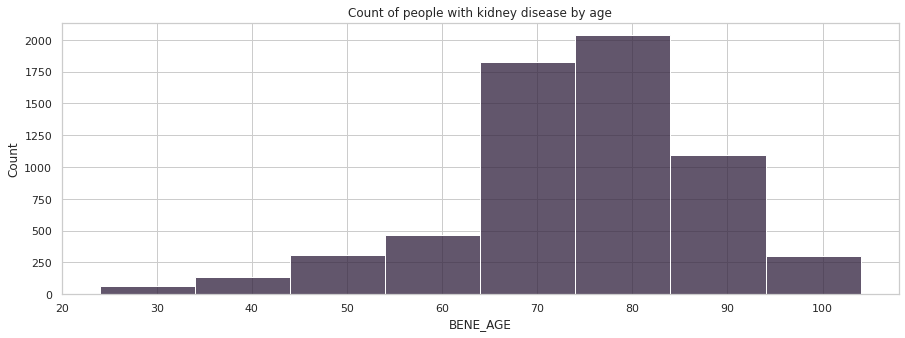

In [54]:
# The number of people with kidney disease by age is as follows

kidneyPatient = dataVis[(dataVis["KIDNEY_INPATIENT"]==2)]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(kidneyPatient["BENE_AGE"]), binwidth=10)
plt.title("Count of people with kidney disease by age")
plt.show()

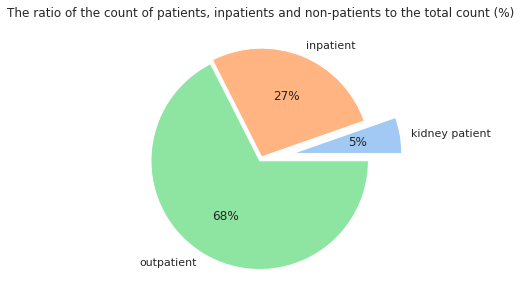

In [55]:
# The ratio of the count of patients, inpatients and non-patients to the total count (%)

DATA = [len(kidneyInpatient),len(normalInpatient),len(outpatient)]
explode = [0.3,0.02,0.02]
labels = ['kidney patient', 'inpatient', 'outpatient']
colors = sb.color_palette('pastel')
plt.pie(DATA, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.title("The ratio of the count of patients, inpatients and non-patients to the total count (%)")
plt.show()

Text(0.5, 1.0, 'Number of patients by race')

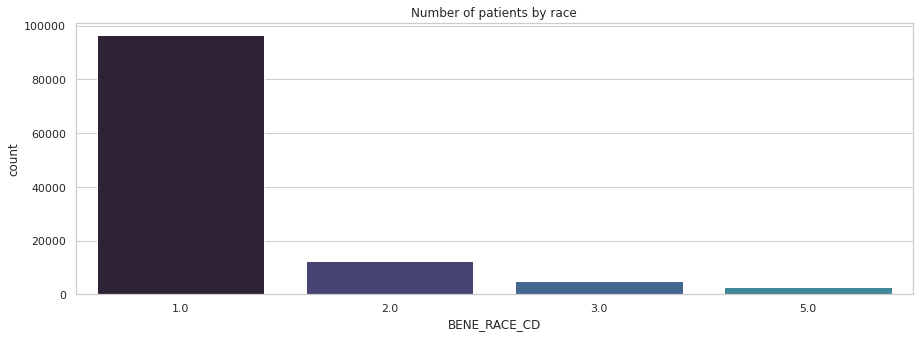

In [56]:
# White:1, Black:2, Others:3, Hispanic:5

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=round(dataVis.groupby(["DESYNPUF_ID"])["BENE_RACE_CD"].mean()))
plt.title("Number of patients by race")

# Model Training

In [57]:
# Model Traning

In [58]:
# We have three label
# 0 = Outpatients
# 1 = Inpatients with different injury
# 2 = Inpatients with kidney injury

In [59]:
# The year of birth and year of registration are not required for our model, so they will be removed from the dataset.

data_new = data.drop(["BENE_BIRTH_DT","ADMS_DT"],axis=1)

In [60]:
# The dataset will be split into two as a train set and a test set.

dataset = data_new
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Decision Tree

In [61]:
# Decision Tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[481   0   0]
 [  0 268 351]
 [  0 351 867]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       0.43      0.43      0.43       619
           2       0.71      0.71      0.71      1218

    accuracy                           0.70      2318
   macro avg       0.71      0.71      0.71      2318
weighted avg       0.70      0.70      0.70      2318



Gradient Boosting Class

In [62]:
# Gradient Boosting Class

clfGrad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clfGrad.score(X_test, y_test)

y_pred = clfGrad.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 481    0    0]
 [   0  140  479]
 [   0  126 1092]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       0.53      0.23      0.32       619
           2       0.70      0.90      0.78      1218

    accuracy                           0.74      2318
   macro avg       0.74      0.71      0.70      2318
weighted avg       0.71      0.74      0.70      2318



Random Forest

In [63]:
# Random Forest

clfRandom = RandomForestClassifier(max_depth=2, random_state=0)
clfRandom.fit(X_train, y_train)

y_pred = clfRandom.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 459    0   22]
 [  30    0  589]
 [  30    0 1188]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       481
           1       0.00      0.00      0.00       619
           2       0.66      0.98      0.79      1218

    accuracy                           0.71      2318
   macro avg       0.51      0.64      0.57      2318
weighted avg       0.53      0.71      0.60      2318



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Class Model After Normalization

In [64]:
# We will apply normalization and retrain the Gradient Boosting Class model

scaler = preprocessing.MinMaxScaler()
minmax_df_train = scaler.fit_transform(X_train)
xtrainNorm = pd.DataFrame(minmax_df_train)

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X_test)
xtestNorm = pd.DataFrame(minmax_df)

clfGrad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xtrainNorm, y_train)
clfGrad.score(xtestNorm, y_test)

y_pred = clfGrad.predict(xtestNorm)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 481    0    0]
 [   0   53  566]
 [   0   45 1173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       0.54      0.09      0.15       619
           2       0.67      0.96      0.79      1218

    accuracy                           0.74      2318
   macro avg       0.74      0.68      0.65      2318
weighted avg       0.71      0.74      0.66      2318

